<center>
    <img src="https://www.ucalgary.ca/themes/ucalgary/ucws_theme/images/UCalgary.svg" width='30%'>
</center>

[comment]: <> (The following line is for the LECTURE title)
<p style="text-align:left;"><font size='6'><b> Deep Learning - Lab </b></font></p>

[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> Pytorch Exercises Part 2 - Solutions </b></font></p>

---


Hello! after successfuly completing the first part of this exercise you should be ready to head in to this collaborative lab armed with some decent insight into the building blocks for an MLP. We'll stick with dense layers for now and keep building our knowledge base until we're comfortable before moving on to more advanced architectures in the next few modules.

In this lab we'll look at:

- Revisitng simple data.
- Visually manifesting our decision boundaries.
- Moving on to more complex data, and begginging to tackle multi-class problems.

\


For now let's refresh our memory. Right now you should be able to:

- take simple data and convert to tensor with ease.
- Solve a binary classification problem intuitively and with Pytorch's Linear API.

## Part 1


Given the above and your previous exercise let's revisit the XOR problem. First of all go ahead and do the follwing:

- Define your data.
- Define your bround truths.
- convert all of the above to tensor and convert to float.

In [5]:
#your code here
import numpy as np
import torch

X = np.array([[0, 0], [0, 1], [1,0], [1, 1]])

gates = {'OR': np.array([0,1,1,1]),
         'AND': np.array([0,0,0,1]),
         'XOR': np.array([0,1,1,0])}


Xt = torch.from_numpy(X).float()
y = torch.from_numpy(gates['XOR']).float()

In [6]:
Xt

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [7]:
y

tensor([0., 1., 1., 0.])

OK great! We have everything we need to work with for now so let's plug in what we've learn into some new concepts.

##Part 2

Pytorch has a pretty lucid object oriented interface, and I've provided the core of th class definiton you need below. Let's go ahead and plug in some dense layers give what we learnt about the `nn.Linear` module in the last session. For this round let's fall back on the configuration that uses the following:

- A one dimensional output.
- A single Rectified Linear Unit.
- Two hidden neurons should be enough but feel free to experiment here.
- Feel free to call the class whatever you'd like!


In [8]:
from IPython.display import IFrame
IFrame(src='https://drive.google.com/file/d/12r-yy2lYIpn4v0ULf8jFMDygPyKaNGSj/preview', width=500, height=300)

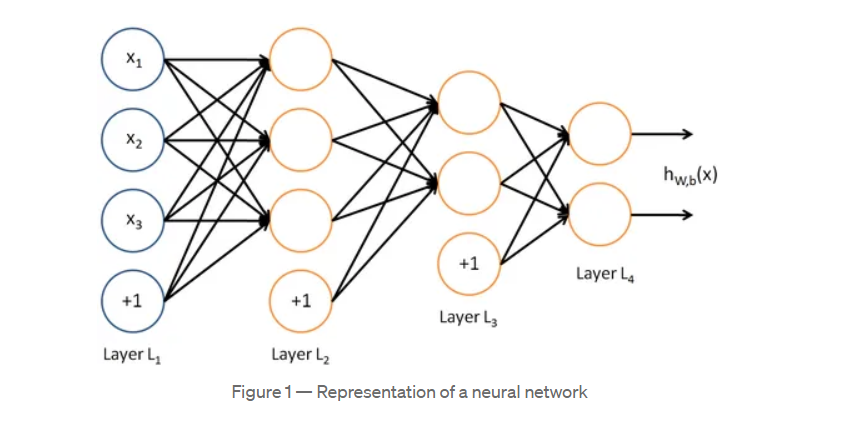


Based on nature, neural networks are the usual representation we make of the brain : neurons interconnected to other neurons which forms a network. A simple information transits in a lot of them before becoming an actual thing, like “move the hand to pick up this pencil”.

The operation of a complete neural network is straightforward : one enter variables as inputs (for example an image if the neural network is supposed to tell what is on an image), and after some calculations, an output is returned (following the first example, giving an image of a cat should return the word “cat”).

Now, you should know that artificial neural network are usually put on columns, so that a neuron of the column n can only be connected to neurons from columns n-1 and n+1. There are few types of networks that use a different architecture, but we will focus on the simplest for now.

Neural networks can usually be read from left to right. Here, the first layer is the layer in which inputs are entered. There are 2 internals layers (called hidden layers) that do some math, and one last layer that contains all the possible outputs. Don’t bother with the “+1”s at the bottom of every columns. It is something called “bias”

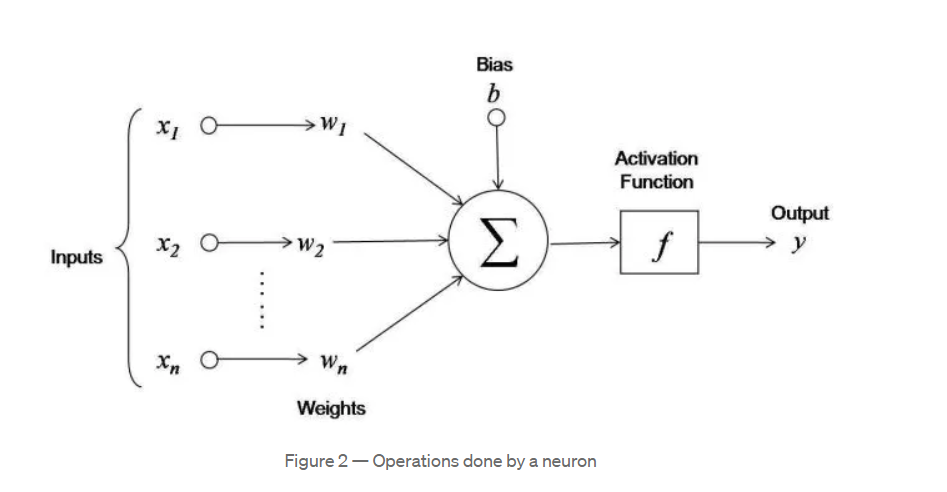

The operations done by each neurons are pretty simple :

First, it adds up the value of every neurons from the previous column it is connected to. On the Figure 2, there are 3 inputs (x1, x2, x3) coming to the neuron, so 3 neurons of the previous column are connected to our neuron.

This value is multiplied, before being added, by another variable called “weight” (w1, w2, w3) which determines the connection between the two neurons. Each connection of neurons has its own weight, and those are the only values that will be modified during the learning process.

Moreover, a bias value may be added to the total value calculated. It is not a value coming from a specific neuron and is chosen before the learning phase, but can be useful for the network.

After all those summations, the neuron finally applies a function called “activation function” to the obtained value.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4) #your code here
        self.fcout = nn.Linear(4, num_classes) #your code here

    def forward(self, x):
        x = torch.relu(self.fcin(x)) #your code here
        x = self.fcout(x) #your code here
        return x


Let's take a look at what's going on here:

- Notice on initialization the super constructir is called. This is simply because we're employing `nn.Linear` from `nn.Module` and that particular superclass need to be initalissed in order to become available within our custom class.

- The real flexibility of this methodology lies in the fact that we can define our layers as objects and later chop and change, add lonlinearities etc in the forward pass.

##Part 3

Before we discuss further however go ahead and:

- initialize your new network class given what you know about OOP.
- pass in our data.

**Hint**

- within the core code I gave you we require both `input_dim` and `num_classes`.

In [10]:
#your code here
model = Net(2,1)
outputs = model(Xt)
print(outputs)

tensor([[0.0862],
        [0.1388],
        [0.1378],
        [0.2211]], grad_fn=<AddmmBackward0>)


Awesome! Let's not stop here and keep building on what we know.

Now this data is super simple. No noise, four points:

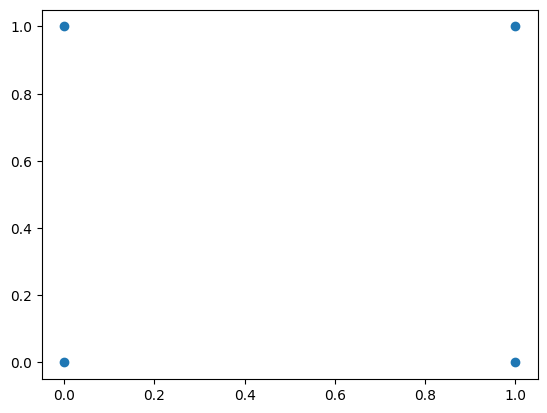

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Given that let's go ahead and put together a simple loader with Pytorch's  DataLoader class. For now we'll shy away from any need for normalization or augmentation given the simplicity of the problem.

In [12]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(Xt,y)

train_loader = data_utils.DataLoader(train , batch_size=1 , shuffle=True)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)

In [13]:
print('batch: 1\n')

for batch_idx,(data , labels) in enumerate(train_loader):
  print(f'input {batch_idx}: {data}, target: {labels}')

print('\nbatch: 4\n')

for batch_idx,(data , labels) in enumerate(train_loaderb4):
  print(f'input {batch_idx}: {data}, target: {labels}')

batch: 1

input 0: tensor([[0., 0.]]), target: tensor([0.])
input 1: tensor([[1., 1.]]), target: tensor([0.])
input 2: tensor([[0., 1.]]), target: tensor([1.])
input 3: tensor([[1., 0.]]), target: tensor([1.])

batch: 4

input 0: tensor([[0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 0.]]), target: tensor([0., 0., 1., 1.])


Now looking at our data loaders here it's easy to see how we might be able to go about intercepting out training data and pushing it through a forward pass, where epochs represent a complete forward and backward pass through the entire datset.



##Part 4

Before we go ahead and begin to add loss and backpropogation into our training loop - Given the description above go ahead and use the data loader to feed what we have into ourn model.

**Note** Notice I've got you on your feet with the first of you nested loops here.

In [14]:
num_epochs = 700
print(train_loaderb4)
for i in range(0, num_epochs):
  #your code here
  for batch_idx,(data , labels) in enumerate(train_loaderb4):
    outputs = model(data)

print(outputs)

tensor([[0.1388],
        [0.0862],
        [0.1378],
        [0.2211]], grad_fn=<AddmmBackward0>)


Great! We're getting somewhere but we're not learning anything. You'll recall from your previous sessions that this is where all of the magic comes into play! Let's take this step by step:

- Recall that the first port of call here is to calculate our loss. Note that we're sticking with a simple hidden layer wrappped in a Relu non-linearity and there `nn.MSELoss` will suffice

\

\begin{align}
MSE =  \frac{{1}}{n}  \sum_{i}^{n} (  y_i-\hat{y_i})^2
\end{align}

\

It's also not uncommon here to keep track of our current loss as a printout or with tensorboard but let's keep things simple for now.

- Second of all we're going to need to reset the gradients we're keeping a track of with `optimizer.zero_grad()` lest we accmulate. Note here that we're using Adam as it's great out of the box and efficient but there'll be more on optimizers in a later session. For now let's experiment with changing our learning rate achives.

- `loss.backward()` will then calculate our partial derivates for the loss function with regards to all the parameters of our network.


- Last of all `optimizer.step()` then peforms our parameter update given our optmizer of choice and the learning rate that we've dialled in.

##Part 6

Ok ok, now you have the foundations of a training loop and a forward pass let's go ahead and stich it together with what we know conceptually about backpropogating our error. As a refresher we need:

- Our part 4 nested training loop.
- our loss function, `nn.MSELoss` in this scenario.
- reset our gradients with `optimizer.zero_grad()`
-Finally calculate our partial derivates with `loss.backward` and update finally apply our parameter updates with `optimizer.step()`

Over to you. You've got this!


In [34]:
#your code here

import torch
import torch.nn as nn

class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4)
        self.fcout = nn.Linear(4, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = self.fcout(x)
        return x

model = Net(2,1)
model.train()

num_epochs = 7000
learning_rate = 0.01

train = data_utils.TensorDataset(Xt,y)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)

criterionCE = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(0, num_epochs):
  for batch_idx,(data , labels) in enumerate(train_loaderb4):
    outputs = model(data)

    loss = criterionCE(outputs , labels.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

pred = model(Xt)
print(outputs)

tensor([[1.],
        [1.],
        [0.],
        [0.]], grad_fn=<AddmmBackward0>)


In [35]:
print(np.where(outputs.detach().cpu().numpy() > 0.5, 1, 0))

[[1]
 [1]
 [0]
 [0]]


##Part 5

Now let's do all of this with the sigmoid outputs we put together in the last exercise in conjunction with `nn.BCELoss`

\

\begin{align}
\mathcal{L}(\theta)
&= -\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^m y_{ij}\log(p_{ij}) \\
&= -\frac{1}{n}\sum_{i=1}^n \left[y_i \log(p_i) + (1-y_i) \log(1-p_i)\right]
\end{align}

\

At this point you should be more than confident to construct this whole thing by yourself so go forward to be the Deep Learning superheroes you were always meant to be!

In [22]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('using gpu!')
else:
  device = torch.device('cpu')
  print('using cpu!')

#or
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#check = torch.load('/content/check.pth', map_location=device)

using gpu!


In [27]:
#your code here

import torch
import time
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4)
        self.fcout = nn.Linear(4, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = torch.sigmoid(self.fcout(x))
        return x

model = Net(2,1)

num_epochs = 7000
learning_rate = 0.01

train = data_utils.TensorDataset(Xt,y)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)

criterionCE = nn.BCELoss()

def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,1)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loaderb4):
      outputs = model(data)

      loss = criterionCE(outputs , labels.unsqueeze(1).float())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

model = run(7000)

model.eval()
pred = model(Xt)

training completed in 7.575007438659668s


In [29]:
print(np.where(pred.detach().cpu().numpy() > 0.5, 1, 0))

[[0]
 [1]
 [1]
 [0]]


You did it! Now the real beauty of using a sigmoid output with Binary crossentropy here is that we're essentially outputting the probability that we're getting closer to a positive class. To really get a sense of this lets manifets our decison boundary. I've supplied all the code you need here simply plug and play your model ensuring that:

- `pt` is set to `True`
- `output_class` is `False`
- Simply pass your model, data and targets and let's see what we get.

---

End of Notebook

---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_decision(X,y,model,size =(8,8),
                  output_class = False,
                  pt = False, device='cpu',
                  text_pred=False,
                  softmax=False):

  h = .02  # step size in the mesh

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  #gives all the possible combination of x_min, x_max, ymin, ymax
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  fig, ax = plt.subplots(figsize=size)

  if pt:
    model.eval()

    input = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float().to(device)
    outputs = model(input)
    if softmax:
      outputs = outputs.data.max(1, keepdim=True)[1]
    Z = outputs.detach().cpu().numpy()


    Xt = torch.from_numpy(X).to(device).float()
    pred = model(Xt)

    if not softmax:
      pred = np.where(pred.detach().cpu().numpy() > 0.5, 1, 0).flatten()
    else:
      pred  =  pred.detach().cpu().numpy().flatten()


  else:

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  if output_class:
    Z = Z >0.5

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)
  ax.axis('on')

  # Plot test points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  if text_pred:
    plt.title(f'pred: {pred}')
  plt.show()

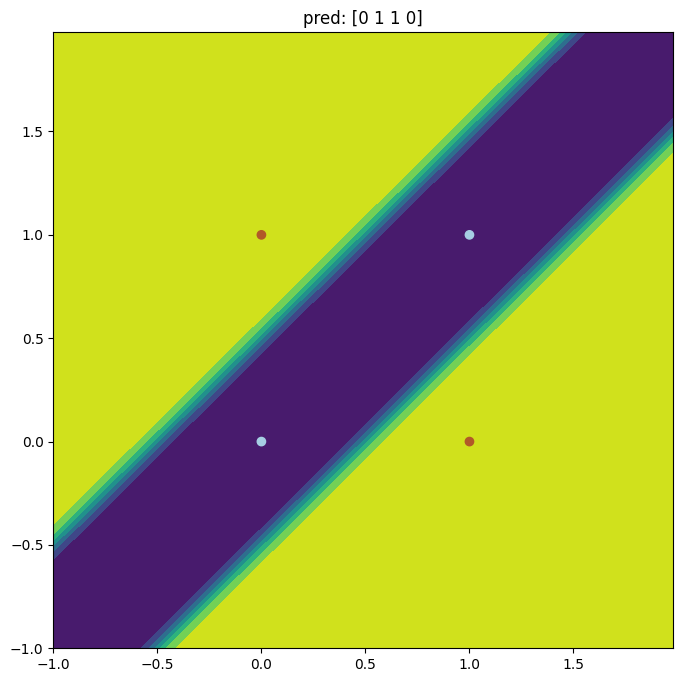

In [ ]:
#your code here

plot_decision(
    X = Xt.numpy(),
    y = y.numpy(),
    model = model,
    output_class = False,
    pt = True,
    text_pred=True
  )

#Extracurriclar

Notice in my answer I've created a simple function in order to be able to re-use the training loop in conjunction with evaluation. What's missing right now however is a couple of concepts we're yet to discuss.

- Should we need to validate our data during a run with more complex data we're going to need to switch our model to evaluation mode `model.eval()` in order to halt any learning. We'll then need to toggle `model.train()` in order to continue  calculating updating our parameters.

- Now is also a good time to discuss the devices available to us. Run the snippet below and see what you get:

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('using gpu!')
else:
  device = torch.device('cpu')
  print('using cpu!')

#or
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

using gpu!


As you can see I have a GPU available after selecting the appropriate option in the `Runtime - Change runtime type - Hardware accelarator` menu above. While the appropriate CUDA drivers for your local discrete NVIDIA GPU, or cloud instance would be present in a different setup.

Given this let's ensure that are model and appropriate data is moved to device for that extra speedup



In [ ]:
Xt = Xt.to(device)
y = y.to(device)

#Note that printing the tensor here will see it tagged with Cuda as the device
print(Xt)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], device='cuda:0')


In [ ]:
import time
train = data_utils.TensorDataset(Xt,y)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)



def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,1)
  model = model.to(device) #to GPU

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loaderb4):
      outputs = model(data)
      loss = criterionCE(outputs , labels.unsqueeze(1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  torch.cuda.synchronize()
  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

model = run(7000)

model.eval()
pred = model(Xt)

training completed in 11.466314554214478s


Note that we're actually seeing a significant hit in terms of training time here as we're not only dealing with the overhead of moving between devices but we're also dealing with small tensors. Parallel computation really shines the deeper we get and the larger our dataset as we'll see in upcoming sessions.

Fo now go

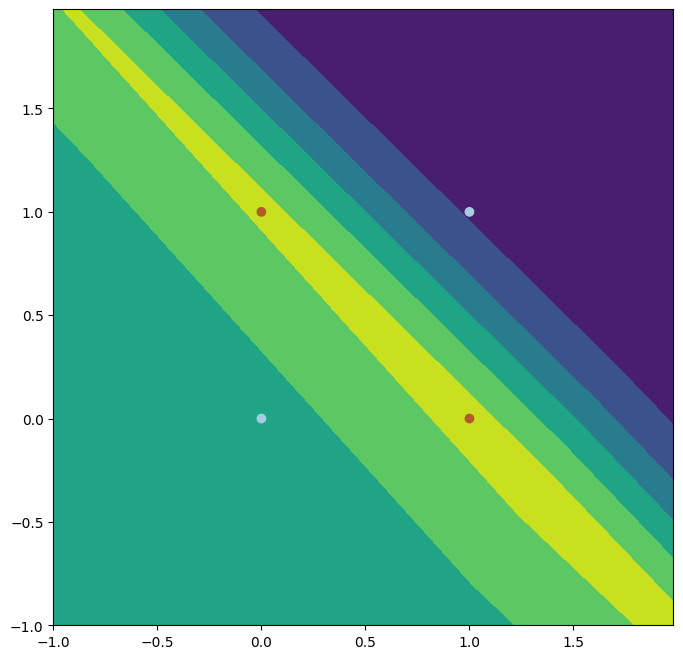

In [ ]:
from IPython.display import clear_output
import time


for i in range (30):
  clear_output(wait=True)
  model = run(i, learning_rate=0.1, bench=False)
  model.eval()



  plot_decision(Xt.cpu().numpy(),y.cpu().numpy(),model.to('cpu'),
                  output_class=False,
                  pt = True)
  time.sleep(0.01)

##Final challenges

Alright! We've made it so let's head over to our final challenge and get this thing done.

###Part 1

solve a binary classification problem once more with new data. Note a few things here:

- I've already provided you with a make moons example and your respective splits, feel free however to hav a play around with the settings.

- You're tasked here with preparing your data for training, and moving to device should you wish.

- Finally utilize the plot fucntion I've provided for you. Bonus points if you can demonstrate the shift in decision boundary with increased epoch once again. This one looks pretty cool as the boundary bends to encapsulate each moon.





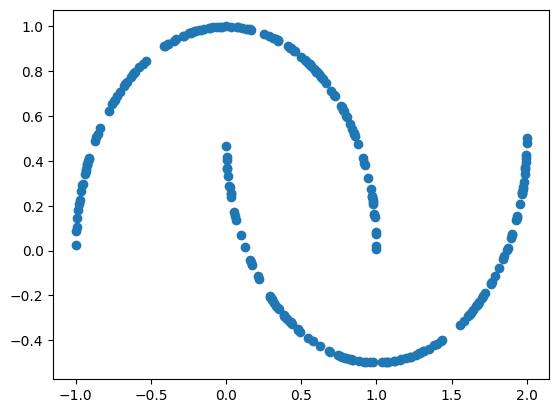

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

plt.scatter(X_test[:,0], X_test[:,1])
plt.show()

In [ ]:
#your code here
import torch
import time
import torch.nn as nn
import torch.nn.functional as F


X_train = torch.from_numpy(X_train).float().to(device) #data
y_train = torch.from_numpy(y_train).float().to(device) #labels


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 64)
        self.fcout = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = torch.sigmoid(self.fcout(x))
        return x


train = data_utils.TensorDataset(X_train,y_train)
train_loader = data_utils.DataLoader(train , batch_size=64 , shuffle=True)

criterionCE = nn.BCELoss()

def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,1)
  model = model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loader):
      data = data.to(device)
      labels = labels.to(device)

      outputs = model(data)

      loss = criterionCE(outputs , labels.unsqueeze(1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

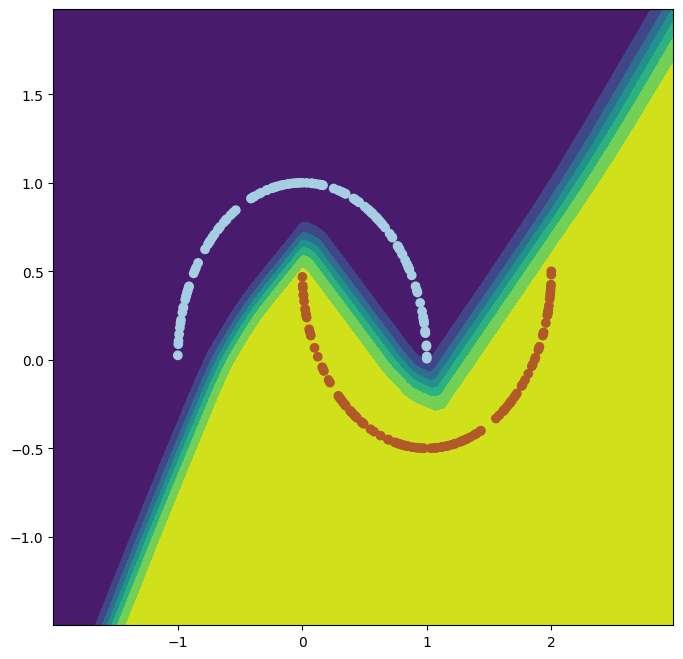

In [ ]:
from IPython.display import clear_output
import time

for i in range (1,30):
  clear_output(wait=True)
  model = run(i, learning_rate=0.01,bench=False)
  plot_decision(X_test,y_test,model, output_class=False, pt = True, device='cuda')
  time.sleep(0.2)

###Part 2

Now this is where we test your investigative skills. You have everything you need to begin to deduce how to piece together more complex scenarios so let's step it up a little here.

Here I've provided you with an arbitrary number of blobs. You're tasked given what you know about the output of our networks so far to create something a little different. Hints, and clues are as follows:

\

- Recall that we've been using a sigmoid output `torch.sigmoid` with an output dimension of 1, giving us a probability that we're looking at our positive class. This time around we'll need a softmax output
\
\
\begin{align}
{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}
\end{align}
\
Where we're hoping to receive an output in the shape of **(batch size, number of classes)**. Recall from your previous sessions that the predictions for each class here sum to 1, where we're hoping to squeeze a the closest match to our target class to the highest probability in the given output.
\
In short, the number of classes in your expected output shape is a big old clue as to the confifuration of your network's output.

- Note also that we're going to be falling back on `nn.CrossEntropyLoss()` as our loss here and - as a hint towards how your network should look - A softmax activation is included and therefore does not need to be included in your network.

- Once again finish up by plotting the result and bonus points for decision boundary evolution. Note importantly here however that `softmax` in `plot_decision` should be toggled to `True`. I've done all the legwork for you in the function and we'll discuss what's going on after the boundaries are successfully manifested.

- Last of all note that this time our labels do not need to be  unsqueezed.

Over to you!

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, random_state=8, centers=4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

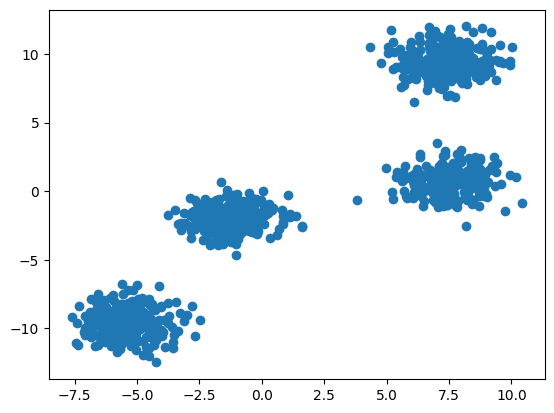

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import torch
import time
import torch.nn as nn



X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 8)
        self.fcout = nn.Linear(8, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = self.fcout(x)
        return x


train = data_utils.TensorDataset(X_train,y_train)
train_loader = data_utils.DataLoader(train , batch_size=64 , shuffle=True)

criterionCE = nn.CrossEntropyLoss()

def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,4)
  model = model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loader):
      data = data.to(device)
      labels = labels.to(device)
      labels = labels.to(torch.int64)
      outputs = model(data)

      loss = criterionCE(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

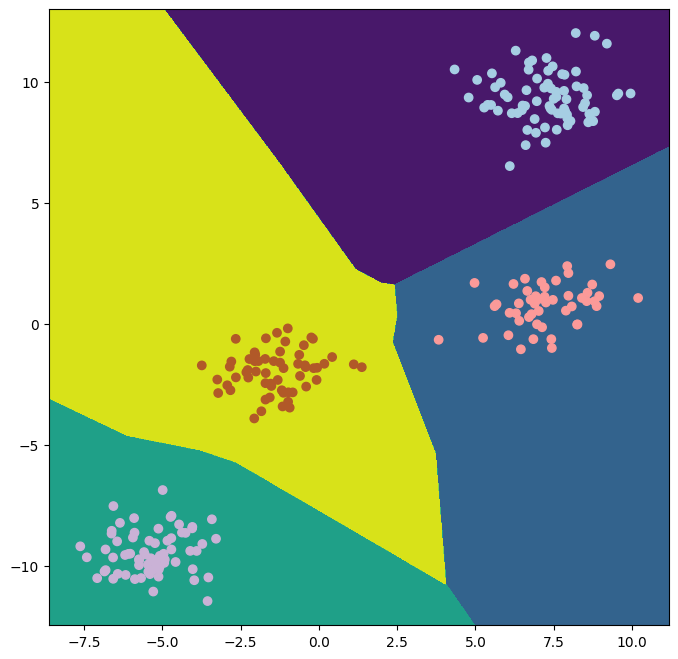

In [ ]:
from IPython.display import clear_output
import time

for i in range (30):
  clear_output(wait=True)
  model = run(i, learning_rate=0.01,bench=False)
  plot_decision(X_test,y_test,model, pt = True, device='cuda', softmax=True)
  time.sleep(0.2)

Wonderful work! Once again we can see the flexibility of our networks in conjunction with both non-linearities along with tuning the complexity of our network.

Recall that we discussed earlier before the challenge that our output is **(batch size, n classes)**. Take a look at the `plot_decision` fucntion after softmax is toggled on. In order to be able to grab the predicted class we need to grab the index of the maximum value for each observation.

In [ ]:
outputs = model(torch.from_numpy(X_test).float().to(device))

print(outputs)
pred = outputs.data.max(1, keepdim=True)[1].flatten()
print(pred[:10])

tensor([[-3.7469e+00,  4.8984e+00, -1.8322e+01, -6.0235e+00],
        [-1.4091e+01, -6.5124e+00,  7.0196e+00,  2.4966e+00],
        [-4.5920e+00,  5.1694e+00, -1.6293e+01, -4.7964e+00],
        [-1.5534e+01, -8.9065e+00,  9.7937e+00,  2.2872e+00],
        [-2.8282e+00,  3.8872e+00, -1.6331e+01, -4.3346e+00],
        [ 7.7560e+00, -3.9718e+00, -3.1874e+01, -1.5287e+01],
        [-1.2998e+01, -7.2674e+00,  7.2082e+00,  2.5873e+00],
        [-1.2773e+01, -7.7742e+00,  7.4726e+00,  2.6483e+00],
        [-3.3391e+00, -2.6894e+00, -2.3098e+00,  4.3396e+00],
        [-5.4838e+00, -2.5242e+00, -8.2454e-01,  3.7999e+00],
        [-1.3268e+01, -7.7052e+00,  7.7478e+00,  2.5279e+00],
        [-4.3119e+00, -1.2643e+00, -2.5657e+00,  4.0199e+00],
        [ 6.0995e+00, -4.0168e+00, -2.5172e+01, -1.0274e+01],
        [-1.4785e+01, -9.1378e+00,  9.5615e+00,  2.4203e+00],
        [-3.8981e+00, -3.2247e+00, -1.8103e+00,  4.4062e+00],
        [-3.5307e+00,  3.1955e+00, -9.2748e+00,  5.5304e-01],
        

Et viola! Perfect we've covered a lot this session but we should all be good to dive into the excitement of literature review, and head on a journey through computer vision!